## Part 1: Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [2]:
# Determine the number of unique values in each column.
attrition_df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4


In [3]:
# Create y_df with the Attrition and Department columns
y_df = attrition_df[['Attrition', 'Department']]

In [4]:
# Create a list of at least 10 column names to use as X data
selected_columns = [
    'Age', 'DistanceFromHome', 'HourlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Create X_df using your selected columns
X_df = attrition_df[selected_columns]

# Show the data types for X_df
print(X_df.dtypes)

Age                        int64
DistanceFromHome           int64
HourlyRate                 int64
NumCompaniesWorked         int64
PercentSalaryHike          int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
dtype: object


In [5]:
# Convert categorical data to numeric
# In this example, all selected columns are already numeric, so no conversion is needed
# If there are categorical columns, use pd.get_dummies

# Check if there are any non-numeric columns
non_numeric_cols = X_df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_cols}\n")

# If there are non-numeric columns, convert them using pd.get_dummies
if len(non_numeric_cols) > 0:
    X_df = pd.get_dummies(X_df, columns=non_numeric_cols)

# Verify all data is now numeric
(X_df.info())

Non-numeric columns: Index([], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DistanceFromHome         1470 non-null   int64
 2   HourlyRate               1470 non-null   int64
 3   NumCompaniesWorked       1470 non-null   int64
 4   PercentSalaryHike        1470 non-null   int64
 5   TotalWorkingYears        1470 non-null   int64
 6   YearsAtCompany           1470 non-null   int64
 7   YearsInCurrentRole       1470 non-null   int64
 8   YearsSinceLastPromotion  1470 non-null   int64
 9   YearsWithCurrManager     1470 non-null   int64
dtypes: int64(10)
memory usage: 115.0 KB


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1176, 10)
X_test shape: (294, 10)
y_train shape: (1176, 2)
y_test shape: (294, 2)


In [7]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create a OneHotEncoder for the Department column
department_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
department_encoder.fit(y_train[['Department']])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_department_encoded = department_encoder.transform(y_train[['Department']])
y_test_department_encoded = department_encoder.transform(y_test[['Department']])
y_train_department_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
# Create a OneHotEncoder for the Attrition column
attrition_encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
attrition_encoder.fit(y_train[['Attrition']])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_attrition_encoded = attrition_encoder.transform(y_train[['Attrition']])
y_test_attrition_encoded = attrition_encoder.transform(y_test[['Attrition']])
y_train_attrition_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

## Create, Compile, and Train the Model

In [16]:
# Find the number of columns in the X training data
input_shape = X_train_scaled.shape[1]
print(f"Number of columns in the X training data: {input_shape}")

# Create the input layer
input_layer = layers.Input(shape=(input_shape,))

# Create at least two shared layers
shared_layer1 = layers.Dense(64, activation='relu')(input_layer)
shared_layer2 = layers.Dense(32, activation='relu')(shared_layer1)

Number of columns in the X training data: 10


In [17]:
# Create a branch for Department with a hidden layer and an output layer
department_hidden_layer = layers.Dense(16, activation='relu')(shared_layer2)
department_output_layer = layers.Dense(y_train_department_encoded.shape[1], activation='softmax', name='department_output')(department_hidden_layer)

In [18]:
# Create a branch for Attrition with a hidden layer and an output layer
attrition_hidden_layer = layers.Dense(16, activation='relu')(shared_layer2)
attrition_output_layer = layers.Dense(y_train_attrition_encoded.shape[1], activation='softmax', name='attrition_output')(attrition_hidden_layer)

In [19]:
# Create the model
model = Model(inputs=input_layer, outputs=[department_output_layer, attrition_output_layer])

# Compile the model
model.compile(
    optimizer='adam',
    loss={'department_output': 'categorical_crossentropy', 'attrition_output': 'categorical_crossentropy'},
    metrics={'department_output': 'accuracy', 'attrition_output': 'accuracy'}
)

# Summarize the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 64)                   704       ['input_2[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 32)                   2080      ['dense_5[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 16)                   528       ['dense_6[0][0]']             
                                                                                            

In [21]:
# Train the model
history = model.fit(
    X_train_scaled,
    [y_train_department_encoded, y_train_attrition_encoded],
    epochs=100, # Number of epochs, adjust as needed
    batch_size=32, # Batch size, adjust as needed
    validation_data=(X_test_scaled, [y_test_department_encoded, y_test_attrition_encoded]),
    verbose=1 # Set to 1 for progress updates, 0 for silent
)

Epoch 1/100
37/37 [==============================] - 0s 5ms/step - loss: 1.0902 - department_output_loss: 0.7185 - attrition_output_loss: 0.3717 - department_output_accuracy: 0.6811 - attrition_output_accuracy: 0.8520 - val_loss: 1.1831 - val_department_output_loss: 0.7949 - val_attrition_output_loss: 0.3881 - val_department_output_accuracy: 0.6395 - val_attrition_output_accuracy: 0.8605
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 1.0847 - department_output_loss: 0.7130 - attrition_output_loss: 0.3717 - department_output_accuracy: 0.6735 - attrition_output_accuracy: 0.8461 - val_loss: 1.1782 - val_department_output_loss: 0.7951 - val_attrition_output_loss: 0.3832 - val_department_output_accuracy: 0.6327 - val_attrition_output_accuracy: 0.8673
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 1.0782 - department_output_loss: 0.7117 - attrition_output_loss: 0.3666 - department_output_accuracy: 0.6760 - attrition_output_accuracy: 0.8452 

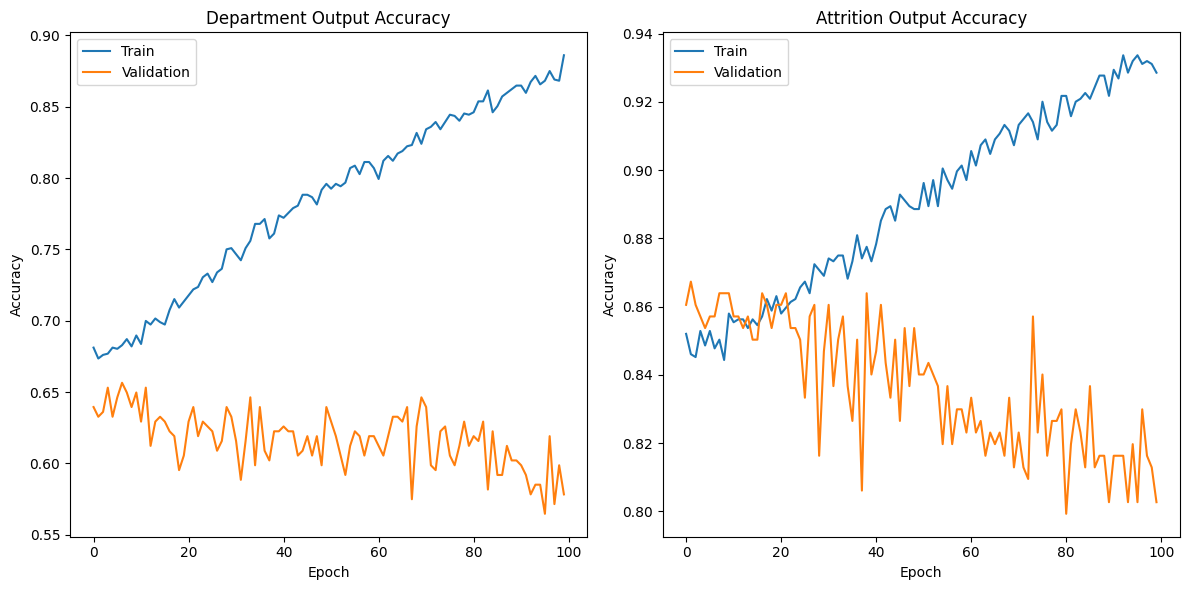

In [22]:
# Optionally, plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['department_output_accuracy'])
plt.plot(history.history['val_department_output_accuracy'])
plt.title('Department Output Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['attrition_output_accuracy'])
plt.plot(history.history['val_attrition_output_accuracy'])
plt.title('Attrition Output Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


In [33]:
# Evaluate the model with the testing data
loss, department_loss, attrition_loss, department_accuracy, attrition_accuracy = model.evaluate(
    X_test_scaled,
    [y_test_department_encoded, y_test_attrition_encoded]
)

# Print the evaluation results
print(model)

10/10 [==============================] - 0s 11ms/step - loss: 1.7794 - department_output_loss: 1.2302 - attrition_output_loss: 0.5492 - department_output_accuracy: 0.5782 - attrition_output_accuracy: 0.8027


In [31]:
# Print the accuracy for both department and attrition
print(f"Department branch accuracy: {department_accuracy}")
print(f"Attrition branch accuracy: {attrition_accuracy}")

Department branch accuracy: 0.5782312750816345
Attrition branch accuracy: 0.8027210831642151


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE
1. ## Possibly;
### While accuracy provides a general measure of performance, other metrics like precision, recall, and F1-score give a more nuanced view, especially in cases of class imbalance or when class-specific performance is critical. You should choose the metric based on your specific problem and the costs associated with false positives and false negatives.
2. ## Softmax;
### The choice of softmax for the output layers aligns with the need to predict multiple classes (for both "Department" and "Attrition"). If I was tasked with binary classification (e.g., predicting whether an employee will leave or stay), I would use sigmoid instead.
3. ## Here's a few:
## Feature Engineering:
### Additional Features: Incorporate additional relevant features that may improve predictive performance.
### Feature Selection: Use techniques to select the most relevant features and reduce dimensionality, which can improve model performance and reduce overfitting.
## Hyperparameter Tuning:
### Layer Sizes and Architecture: Experiment with different numbers of layers and neurons. Consider deeper or more complex architectures if the problem is complex.
### Learning Rate: Adjust the learning rate of the optimizer. Learning rate schedules or adaptive learning rate methods (e.g., learning rate decay) can help.
## Improving Data Quality:
### Data Cleaning: Ensure that the data is clean, consistent, and free from errors or outliers.
## Advanced Optimizers:
### Optimizer Choice: Experiment with different optimizers (e.g., RMSprop, AdamW) or different settings for the Adam optimizer.